# QA_Prod (v1.1)

In [7]:
%matplotlib notebook

In [6]:
# imports
from desispec.qa import qa_prod as dqap

## Init

    setenv DESI_SPECTRO_DATA /Users/xavier/DESI/DESI_SCRATCH/sim/madrone/

In [7]:
specprod_dir = '/Users/xavier/DESI/DESI_SCRATCH/redux/madrone/'

In [8]:
reload(dqap)
qa_prod = dqap.QA_Prod(specprod_dir)

## Remake

#### In Python

In [4]:
qa_prod.remake_frame_qa(remake_plots=True)

INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000003.yaml


/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000003.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-r0-00000003.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000003.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000003.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-r1-00000003.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000003.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000003.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-b0-00000003.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000003.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000003.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-b1-00000003.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000003.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000003.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-z0-00000003.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000003.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000003.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-z1-00000003.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000004.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-r0-00000004.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000004.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-r1-00000004.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000004.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-b0-00000004.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000004.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-b1-00000004.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000004.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-z0-00000004.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000004.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-z1-00000004.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000005.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-r0-00000005.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000005.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-r1-00000005.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000005.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-b0-00000005.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000005.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-b1-00000005.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000005.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-z0-00000005.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000005.yaml


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-flat-z1-00000005.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r0-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r0-00000006.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.68364


INFO:DESI:Median residual for sky fibers = 0.68364


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-sky-r0-00000006.pdf


/Users/xavier/DESI/desispec/py/desispec/fluxcalibration.py:568: RuntimeWarning: invalid value encountered in log10
  ZP_AB = -2.5 * np.log10(ZP_fnu) - 48.6


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-flux-r0-00000006.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r1-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r1-00000006.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.779633


INFO:DESI:Median residual for sky fibers = 0.779633


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-sky-r1-00000006.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-flux-r1-00000006.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b0-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b0-00000006.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.714767


INFO:DESI:Median residual for sky fibers = 0.714767


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-sky-b0-00000006.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-flux-b0-00000006.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b1-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b1-00000006.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.781754


INFO:DESI:Median residual for sky fibers = 0.781754


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-sky-b1-00000006.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-flux-b1-00000006.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z0-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z0-00000006.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.561035


INFO:DESI:Median residual for sky fibers = 0.561035


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-sky-z0-00000006.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-flux-z0-00000006.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z1-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z1-00000006.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.687958


INFO:DESI:Median residual for sky fibers = 0.687958


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-sky-z1-00000006.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-flux-z1-00000006.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r0-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r0-00000007.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.824932


INFO:DESI:Median residual for sky fibers = 0.824932


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-sky-r0-00000007.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-flux-r0-00000007.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r1-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r1-00000007.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.685858


INFO:DESI:Median residual for sky fibers = 0.685858


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-sky-r1-00000007.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-flux-r1-00000007.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b0-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b0-00000007.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.797745


INFO:DESI:Median residual for sky fibers = 0.797745


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-sky-b0-00000007.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-flux-b0-00000007.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b1-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b1-00000007.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.764565


INFO:DESI:Median residual for sky fibers = 0.764565


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-sky-b1-00000007.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-flux-b1-00000007.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z0-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z0-00000007.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.482605


INFO:DESI:Median residual for sky fibers = 0.482605


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-sky-z0-00000007.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-flux-z0-00000007.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z1-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z1-00000007.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.541367


INFO:DESI:Median residual for sky fibers = 0.541367


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-sky-z1-00000007.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-flux-z1-00000007.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r0-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r0-00000008.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.785324


INFO:DESI:Median residual for sky fibers = 0.785324


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-sky-r0-00000008.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-flux-r0-00000008.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r1-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r1-00000008.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.808418


INFO:DESI:Median residual for sky fibers = 0.808418


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-sky-r1-00000008.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-flux-r1-00000008.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b0-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b0-00000008.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.743114


INFO:DESI:Median residual for sky fibers = 0.743114


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-sky-b0-00000008.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-flux-b0-00000008.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b1-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b1-00000008.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.747116


INFO:DESI:Median residual for sky fibers = 0.747116


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-sky-b1-00000008.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-flux-b1-00000008.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z0-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z0-00000008.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.626495


INFO:DESI:Median residual for sky fibers = 0.626495


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-sky-z0-00000008.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-flux-z0-00000008.pdf
INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z1-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z1-00000008.yaml


INFO:sky.py:271:qa_skysub: Median residual for sky fibers = 0.579102


INFO:DESI:Median residual for sky fibers = 0.579102


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-sky-z1-00000008.pdf


Wrote QA SkyRes file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-flux-z1-00000008.pdf


#### Script

    desi_qa_prod --specprod_dir /Users/xavier/DESI/DESI_SCRATCH/redux/madrone --remake_frame 3

## Slurp

#### In Python

In [9]:
qa_prod.slurp(remove=False)

INFO:qa_prod.py:127:slurp: Resetting qa_exps in qa_prod


INFO:DESI:Resetting qa_exps in qa_prod


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000004.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000004.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000004.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000004.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000004.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000004.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000004.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r0-00000005.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-r1-00000005.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b0-00000005.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-b1-00000005.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z0-00000005.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000005.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/calib2d/20160607/qa-z1-00000005.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r0-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r0-00000006.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r1-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-r1-00000006.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b0-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b0-00000006.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b1-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-b1-00000006.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z0-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z0-00000006.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z1-00000006.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000006/qa-z1-00000006.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r0-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r0-00000007.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r1-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-r1-00000007.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b0-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b0-00000007.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b1-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-b1-00000007.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z0-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z0-00000007.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z1-00000007.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000007/qa-z1-00000007.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r0-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r0-00000008.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r1-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-r1-00000008.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b0-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b0-00000008.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b1-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-b1-00000008.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z0-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z0-00000008.yaml


INFO:qa.py:81:load_qa_frame: Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z1-00000008.yaml


INFO:DESI:Loaded QA file /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/exposures/20160607/00000008/qa-z1-00000008.yaml


> /Users/xavier/DESI/desispec/py/desispec/io/qa.py(207)write_qa_prod()
-> ydict = yamlify(odict)
(Pdb) odict
{u'20160607': {8: {'r0': {'SKYSUB': {'QA': {'RESID_PER': [-36.97829895019531, 39.67941284179682], 'NBAD_PCHI': 32, 'MED_RESID': 0.7853240966796875, 'NREJ': 0, 'NSKY_FIB': 37}, 'PARAM': {'PCHI_RESID': 0.05, 'PER_RESID': 95.0}}, 'FLUXCALIB': {'QA': {'ZP': 25.45832393925364, 'RMS_ZP': 0.12910721292221178, 'NSTARS_FIBER': 12, 'MAX_ZP_OFF': [0.44742047713707933, 0]}, 'PARAM': {'ZP_WAVE': 6500.0, 'MAX_ZP_OFF': 0.2}}}, 'r1': {'SKYSUB': {'QA': {'RESID_PER': [-36.657647705078126, 39.28890380859374], 'NBAD_PCHI': 26, 'MED_RESID': 0.8084182739257812, 'NREJ': 0, 'NSKY_FIB': 37}, 'PARAM': {'PCHI_RESID': 0.05, 'PER_RESID': 95.0}}, 'FLUXCALIB': {'QA': {'ZP': 25.45997770871619, 'RMS_ZP': 0.1431706318008319, 'NSTARS_FIBER': 13, 'MAX_ZP_OFF': [0.49130059958766026, 0]}, 'PARAM': {'ZP_WAVE': 6500.0, 'MAX_ZP_OFF': 0.2}}}, 'b0': {'SKYSUB': {'QA': {'RESID_PER': [-28.37047500610352, 30.21094894409174],

BdbQuit: 

#### Script
    desi_qa_prod --specprod_dir /Users/xavier/DESI/DESI_SCRATCH/redux/madrone/ --slurp --make_frameqa=1

## Simple Figs

In [1]:
from desispec.qa import qa_prod as dqap

In [23]:
specprod_dir = '/Users/xavier/DESI/DESI_SCRATCH/redux/madrone/'
reload(dqap)
qa_prod = dqap.QA_Prod(specprod_dir)

### Load QA

In [24]:
qa_prod.load_data()

INFO:qa.py:194:load_qa_prod: Loading QA prod file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone//madrone_qa.yaml


INFO:DESI:Loading QA prod file: /Users/xavier/DESI/DESI_SCRATCH/redux/madrone//madrone_qa.yaml


In [25]:
qa_prod.data['20160607'][6]['b0']#['SKYSUB']['QA']

{'FLUXCALIB': {'PARAM': {'MAX_ZP_OFF': 0.2, 'ZP_WAVE': 4800.0},
  'QA': {'MAX_ZP_OFF': [0.42782486423042343, 0],
   'NSTARS_FIBER': 12,
   'RMS_ZP': 0.1314210920024438,
   'ZP': 25.59400318823343}},
 'SKYSUB': {'PARAM': {'PCHI_RESID': 0.05, 'PER_RESID': 95.0},
  'QA': {'MED_RESID': 0.7147674560546875,
   'NBAD_PCHI': 37,
   'NREJ': 0,
   'NSKY_FIB': 37,
   'RESID_PER': [-28.371025466918944, 30.451000976562497]}}}

### Grab an array of QA values

In [28]:
sky_resid_b, ne_dict = qa_prod.get_qa_array('SKYSUB', 'MED_RESID', channels=['b'])
sky_resid_b

array([ 0.71476746,  0.78175354,  0.79774475,  0.76456451,  0.74311447,
        0.74711609])

In [29]:
ne_dict

{'20160607': [6, 7, 8]}

### Histogram

<IPython.core.display.Javascript object>


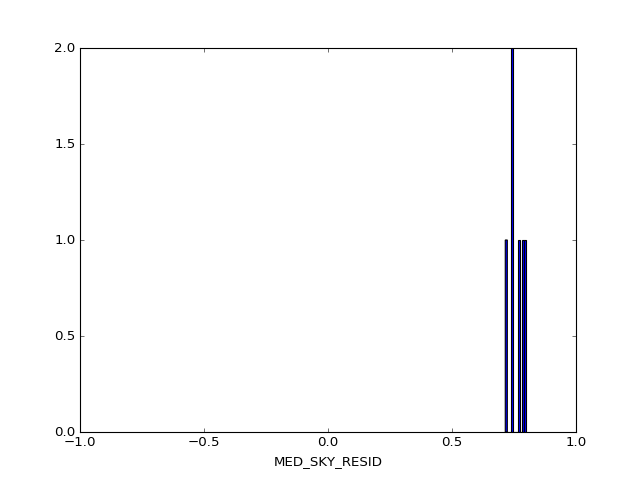

In [8]:
plt.clf()
ax = plt.gca()
ax.hist(sky_resid_b)
ax.set_xlim(-1,1)
ax.set_xlabel('MED_SKY_RESID')

## Camera Histograms

In [9]:
from desispec.qa import qa_plots as dqqp

/Users/xavier/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<IPython.core.display.Javascript object>


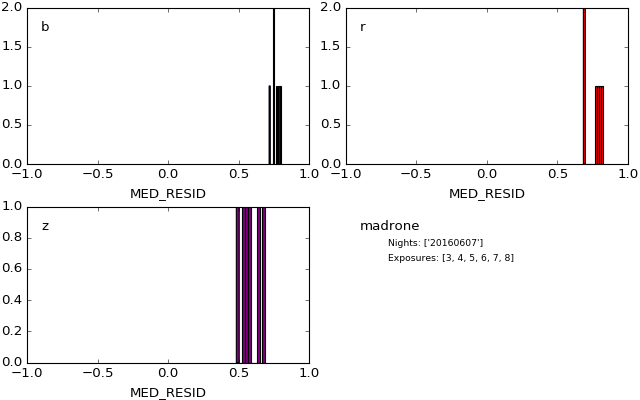

In [20]:
reload(dqqp)
dqqp.prod_channel_hist(qa_prod, 'SKYSUB', 'MED_RESID', xlim=(-1,1))